# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [1]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



-----
1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
-----

### This exercise can be solved in two main ways:

#### Way 1 (By hand):

We can start by drawing the transition diagram by hand.

Then we simply look and find EVERY possible path from Suburbs to Downtown region in two time steps. Since the exercise does not say anything about visiting Downtown twice, this is possible. 

This makes these three possible paths:

* Path 1:
    - Suburbs $\rightarrow$ Suburbs $\rightarrow$ Downtown $\Rrightarrow$ $0.5 \cdot 0.2$ = $0.10$

* Path 2:
    - Suburbs $\rightarrow$ Countryside $\rightarrow$ Downtown $\Rrightarrow$ $0.3 \cdot 0.4$ = $0.12$

* Path 3:
    - Suburbs $\rightarrow$ Downtown $\rightarrow$ Downtown $\Rrightarrow$ $0.2 \cdot 0.3$ = $0.06$

This means that the total probability of being in suburbs after two time steps, starting from Suburbs is simply the sum of these three paths:
* $0.10 + 0.12 + 0.06 = 0.28$


#### Way 2 (Using code to solve):

We start by setting up the matrix using numpy.array([[], [], []]). We use three [] since we have three transitions. 

Then we simply multiply the matrix by itself to get P2. We want P2 since the questions asks about probability after 2 time steps. If the question would be after 5 time steps, then we simply want P5, and multiply matrix with itself 5 times. 

This is achieved by using:

```python
    P2 = np.linalg.matrix_power(P, 2)
```

Then to get the probability, we need to either print the matrix and look at starting from Suburbs and then going to DOwntown and that probability from the matrix P2 is simply the answer. 

Otherwise we could also do:

```python
    probability = P2[1, 0] # From Suburbs (0) to Downtown (0)
```

To receive the probability at once. 

In [3]:
# Part 1

# Fill in the answer to part 1 below

P = np.array([[0.3, 0.4, 0.3], [0.2, 0.5, 0.3], [0.4, 0.3, 0.3]])

P2 = np.linalg.matrix_power(P, 2)
probability = P2[1, 0]

problem1_p1 = probability

print(f"The probability of being in suburbs after two time steps, starting from Suburbs is {problem1_p1}")

The probability of being in suburbs after two time steps, starting from Suburbs is 0.28


-----
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
-----

here we have two possible paths since we can only visit Downtown Once (the last time)

* Path 1:
    - Suburbs $\rightarrow$ Suburbs $\rightarrow$ Downtown $\Rrightarrow$ $0.5 \cdot 0.2$ = $0.10$

* Path 2:
    - Suburbs $\rightarrow$ Countryside $\rightarrow$ Downtown $\Rrightarrow$ $0.3 \cdot 0.4$ = $0.12$

THis gives the total probability: $0.10 + 0.12 = 0.22$, and this is the answer!§

In [4]:
# Part 2

# Fill in the answer to part 2 below
problem1_p2 = 0.22

-----
3. Is this Markov chain irreducible? Explain your answer. [3p]
-----

In [5]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


-----
4. What is the stationary distribution? [3p]
-----

In [6]:
# Part 4

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!

# This function below simply calculates the stationary distribution:

def stationary_distribution(P):
    """
    Computes the stationary distribution of a Markov chain
    by finding the eigenvector corresponding to eigenvalue 1.
    """
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    
    # Find the eigenvector associated with eigenvalue 1
    idx = np.argmin(np.abs(eigenvalues - 1))
    vec = np.real(eigenvectors[:, idx])
    
    # Normalize to sum to 1
    stationary = vec / np.sum(vec)
    return stationary

# We already have P from Part 1:
stationary_dist = stationary_distribution(P).round(4)

# Does the stationary distribution sum up to 1?
print(f"Stationary distribution sums up to 1 is: {stationary_dist.sum() == 1}")

print(f"This is the stationary distribution: \n {stationary_dist}")

problem1_stationary = stationary_dist

Stationary distribution sums up to 1 is: True
This is the stationary distribution: 
 [0.2889 0.4111 0.3   ]


-----
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].
-----

In [7]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps

# This function calculates the Expected number of steps:


import numpy as np

def expected_hitting_time(P, target_states, start_state=None, start_dist=None):
    """
    Compute expected hitting times to a given set of target states in a finite Markov chain.

    Parameters
    ----------
    P : np.ndarray, shape (n, n)
        Transition matrix of the Markov chain.
    target_states : iterable of int
        Indices of the target states.
    start_state : int, optional
        If provided, return the expected hitting time starting from this state.
    start_dist : array-like, shape (n,), optional
        If provided, return the expected hitting time under this initial distribution.

    Returns
    -------
    float or np.ndarray
        - If start_state is given: expected hitting time from that state.
        - If start_dist is given: expected hitting time under that distribution.
        - If neither is given: array h of length n with expected hitting times
          from all states (targets have value 0).

    Notes
    -----
    This solves the linear system

        (I - Q) h_S = 1

    where Q is the submatrix of P restricted to non-target states,
    and 1 is a vector of ones. Assumes that the target set is hit
    with probability 1 from the relevant starting states.
    """
    P = np.asarray(P, dtype=float)
    n = P.shape[0]

    target_states = np.array(sorted(set(target_states)), dtype=int)
    all_states = np.arange(n, dtype=int)

    # Non-target states S
    non_target_states = np.array([s for s in all_states if s not in target_states], dtype=int)

    # If all states are targets, hitting time is identically zero
    if non_target_states.size == 0:
        h = np.zeros(n, dtype=float)
        if start_state is not None:
            return float(h[start_state])
        if start_dist is not None:
            start_dist = np.asarray(start_dist, dtype=float)
            return float(start_dist @ h)
        return h

    # Build Q and solve (I - Q) h_S = 1
    Q = P[np.ix_(non_target_states, non_target_states)]
    I = np.eye(Q.shape[0])
    ones = np.ones(Q.shape[0])

    # Solve for h_S
    h_S = np.linalg.solve(I - Q, ones)

    # Put back into full vector h of length n
    h = np.zeros(n, dtype=float)
    h[target_states] = 0.0
    for idx, s in enumerate(non_target_states):
        h[s] = h_S[idx]

    # Return according to user request
    if (start_state is not None) and (start_dist is not None):
        raise ValueError("Provide either start_state or start_dist, not both.")

    if start_state is not None:
        return float(h[start_state])

    if start_dist is not None:
        start_dist = np.asarray(start_dist, dtype=float)
        if start_dist.shape[0] != n:
            raise ValueError("start_dist must have length equal to number of states.")
        return float(start_dist @ h)

    return h

# QUESTION TO ANSWER:
# What is the expected number of steps until the first time one enters the suburbs region having 
# started in the downtown region.

ET_downtown_to_suburbs = expected_hitting_time(P, target_states=[1], start_state=0)

print(f"This is the expected number of steps until the first time one enters the suburbs region having started in the downtown region: \n {ET_downtown_to_suburbs}")

# If we wanted to round the answer, this is how we do it:
rounded_ET = round(ET_downtown_to_suburbs, 2)
print(f"Rounded answer is: {rounded_ET}")
problem1_ET = ET_downtown_to_suburbs

This is the expected number of steps until the first time one enters the suburbs region having started in the downtown region: 
 2.702702702702703
Rounded answer is: 2.7



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


-----

You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
-----

In [8]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/abalone.csv")
problem2_df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

# Fill in the target as a string with the correct column name

problem2_target = "Rings"

-----
2. Split the data into train and test. [2p]
-----

In [10]:
# Part 2

X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

# X.head(5)
# X.columns

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(
    X, y, random_state=42, train_size=0.8
)

-----
3. Train the model. [1p]

-----

In [11]:
# Part 3

# Include the necessary imports

# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-----
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]

-----

In [12]:
# Part 4

# Evaluate the model by computing the mean absolute error 

y_pred = problem2_model.predict(problem2_X_test)

y_true = problem2_y_test

problem2_mae = mean_absolute_error(y_true, y_pred)

print(f"The Mean Absolute Error is: {problem2_mae}")


The Mean Absolute Error is: 1.629248267393658


Number of test samples n = 836
DKW epsilon (95% band)  = 0.0470


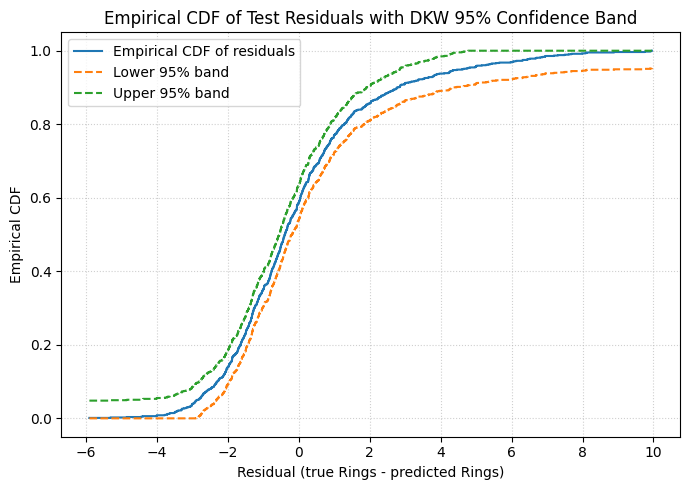

In [13]:
# This is one way to to the exercise regarding the plotting of the empirical function of the residual
# with confidence bands with 95% confidence:

residuals = (y_true - y_pred).to_numpy()


residuals_sorted = np.sort(residuals)
n = len(y_true)

ecdf_values = np.arange(1, n + 1) / n  # k/n for k = 1,...,n

alpha = 0.05

epsilon = np.sqrt(np.log(alpha / 2) / (-2*n))

# 4. Compute lower and upper confidence bands (clipped to [0, 1])
lower_band = np.clip(ecdf_values - epsilon, 0.0, 1.0)
upper_band = np.clip(ecdf_values + epsilon, 0.0, 1.0)

print(f"Number of test samples n = {n}")
print(f"DKW epsilon (95% band)  = {epsilon:.4f}")

# 5. Plot the empirical CDF and the confidence band
plt.figure(figsize=(7, 5))

# Empirical CDF as a step function
plt.step(residuals_sorted, ecdf_values, where="post", label="Empirical CDF of residuals")

# Confidence band as two lines
plt.step(residuals_sorted, lower_band, where="post", linestyle="--", label="Lower 95% band")
plt.step(residuals_sorted, upper_band, where="post", linestyle="--", label="Upper 95% band")

plt.xlabel("Residual (true Rings - predicted Rings)")
plt.ylabel("Empirical CDF")
plt.title("Empirical CDF of Test Residuals with DKW 95% Confidence Band")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.tight_layout()
plt.show()

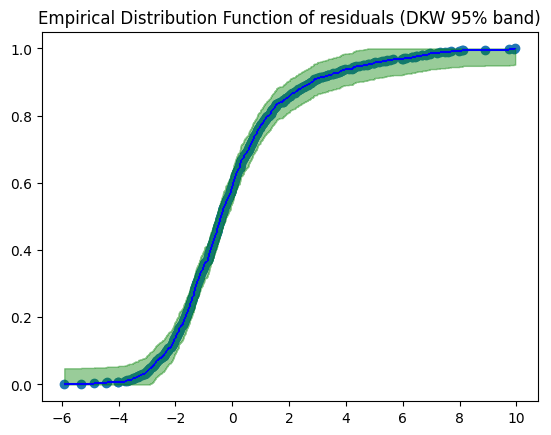

In [14]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

# THIS IS THE OPTIMAL WAY TO PLOT THE EMPIRICAL DISTRIBUTION FUNCTION WITH 95% CONFIDENCE BANDS:

# from Utils import makeEDF,plotEDF
from Utils import makeEDF, plotEDF

y_pred = problem2_model.predict(problem2_X_test)

y_true = problem2_y_test

residuals = (y_true - y_pred).to_numpy()

# 4) Build EDF using Utils.py
edf_residuals = makeEDF(residuals)

# 5) Plot EDF with DKW confidence band (95% confidence => alpha=0.95)
plotEDF(
    edf_residuals,
    confidence_band=True,
    alpha=0.95,
    title="Empirical Distribution Function of residuals (DKW 95% band)"
)

-----
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
-----

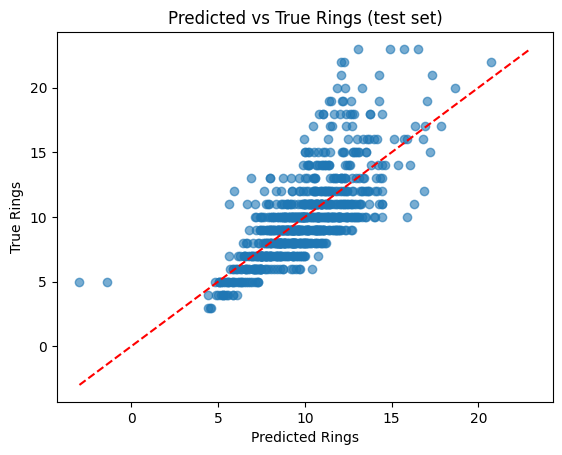

In [15]:
# Part 5

# Write the code below to produce the scatter plot for part 5

y_pred = problem2_model.predict(problem2_X_test)

y_true = problem2_y_test

plt.scatter(y_pred, y_true, alpha=0.6)
plt.xlabel("Predicted Rings")
plt.ylabel("True Rings")
plt.title("Predicted vs True Rings (test set)")
# Identity line (perfect predictions)
min_val = min(np.min(y_pred), np.min(y_true))
max_val = max(np.max(y_pred), np.max(y_true))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal: y = ŷ")

plt.show()


-----
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]
-----

In [16]:
min_rings_value = problem2_df["Rings"].min()
max_rings_value = problem2_df["Rings"].max()

print(f"The minimum amount of rings in dataset: {min_rings_value} \n The maximum amount of rings in dataset: {max_rings_value}")

The minimum amount of rings in dataset: 1 
 The maximum amount of rings in dataset: 29


### Model performance analysis

The mean absolute error (MAE) on the test set is approximately **1.63 rings**, which means that, on average, the model’s predictions differ from the true age by about 1–2 rings. Given that the number of rings typically ranges roughly from 1 to over 20 in the dataset, this indicates a **reasonably good predictive performance** for a simple linear regression model.

The scatter plot of predicted versus true values shows a clear positive relationship, with many points lying close to the identity line, indicating that the model captures the overall trend in the data. However, the spread around the diagonal increases for larger ring values, suggesting that the model tends to be less accurate for older abalones and that prediction uncertainty grows in this range. Overall, the model performs well but shows limitations typical of a linear model when applied to more complex or nonlinear patterns.


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


-----

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
-----

In [17]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv

# sep=' ' → columns are separated by spaces
problem3_df = pd.read_csv("data/visits_clean.csv", sep= ' ')
problem3_df.head(5)

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [18]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = [
    "exclhlth",
    "poorhlth",
    "numchron",
    "adldiff",
    "noreast",
    "midwest",
    "west",
    "age",
    "male",
    "married",
    "school",
    "faminc",
    "employed",
    "privins",
    "medicaid"
]

# Fill in the target as a string with the correct column name

problem3_target = "ofp"

## Part 1

#### What features are reasonable?

Reasonable features are variables that describe patient characteristics which are known before physician office visits occur and that plausibly influence healthcare usage. In this model, we include health status variables (`exclhlth`, `poorhlth`, `numchron`, `adldiff`), demographic variables (`age`, `male`, `married`), socioeconomic indicators (`school`, `faminc`, `employed`), insurance coverage (`privins`, `medicaid`), and geographic region indicators (`noreast`, `midwest`, `west`). These variables capture underlying health needs, access to care, and structural differences across populations. Variables measuring other types of healthcare utilization were excluded to avoid information leakage.

#### In regards to how much data we have, how many features do you think we should aim for?

Given a moderate-sized dataset, a feature set of around 10–15 well-motivated variables is reasonable. This allows the model to capture important sources of variation without introducing excessive variance or overfitting. Since Poisson regression with a log link is relatively stable, this number of features is appropriate for the available data.

#### What other features would you like to have used but was not collected?

Additional useful features could include lifestyle factors such as smoking status, physical activity, or diet, as well as mental health indicators and measures of access to healthcare (for example distance to providers or appointment availability). These variables could further explain differences in physician office visit behavior.

#### Discussion

The selected features focus on exogenous patient characteristics that influence healthcare demand and access while avoiding variables that are direct outcomes of healthcare utilization. This results in a realistic and interpretable Poisson regression model that aligns with both statistical modeling principles and real-world prediction scenarios.


-----
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
-----

In [19]:
# Part 2

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = problem3_df[problem3_target]

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X, problem3_y, train_size=0.8, random_state=42
)

-----
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
-----

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

## Deriving the Poisson regression loss (from conditional log-likelihood)

We model the target as a Poisson random variable conditional on the features:
$Y \mid X=x \sim \text{Poisson}(\lambda(x))$ with
$\lambda(x) = \exp(\alpha \cdot x + \beta)$,
so that $\lambda(x) > 0$ automatically.

The conditional density (pmf) is
$f_{Y\mid X}(y,x) = \frac{\lambda(x)^y e^{-\lambda(x)}}{y!}$.

### Step 1: Conditional negative log-likelihood

From the lecture notes, the objective for regression via maximum likelihood is to minimize the *negative conditional log-likelihood*. Since the marginal density of $X$ does not depend on the model parameters, only the conditional density $f_{Y\mid X}$ is relevant.

Given data $(x_i, y_i)$ for $i=1,\dots,n$, the conditional negative log-likelihood is:
$$
-\sum_{i=1}^n \log\left(f_{Y\mid X}(y_i, x_i)\right).
$$

### Step 2: Take the log of the Poisson pmf

For one observation:
$$
\log f_{Y\mid X}(y_i, x_i)
= \log\left(\frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}\right)
= y_i\log(\lambda_i) - \lambda_i - \log(y_i!)
$$
where $\lambda_i = \lambda(x_i)$.

### Step 3: Drop constants that do not depend on the parameters

The term $\log(y_i!)$ does **not** depend on $\lambda_i$, and $\lambda_i$ is the only quantity that depends on $(\alpha,\beta)$. Therefore, $\sum_i \log(y_i!)$ is constant with respect to the parameters and can be discarded. This is also essential to avoid numerical issues with factorials.

Up to an additive constant, the negative conditional log-likelihood becomes:
$$
-\sum_{i=1}^n \left(y_i\log(\lambda_i) - \lambda_i\right)
=
\sum_{i=1}^n \left(\lambda_i - y_i\log(\lambda_i)\right).
$$

### Step 4: Substitute $\lambda_i = \exp(\alpha\cdot x_i + \beta)$

Since $\lambda_i = \exp(\alpha\cdot x_i + \beta)$ and $\log(\lambda_i) = \alpha\cdot x_i + \beta$, a valid loss function to minimize is:
$$
\text{Loss}(\alpha,\beta)
=
\sum_{i=1}^n \left(\exp(\alpha\cdot x_i + \beta) - y_i(\alpha\cdot x_i + \beta)\right).
$$

### Final loss used in code

In practice, it is common to divide the loss by $n$ and minimize the **average negative log-likelihood**, which does not change the minimizer:
$$
\text{Loss}
=
\frac{1}{n}\sum_{i=1}^n \left(\lambda_i - y_i\log(\lambda_i)\right),
\quad
\lambda_i = \exp(\alpha\cdot x_i + \beta).
$$

This expression corresponds to the negative conditional log-likelihood without the $y_i!$ term and is therefore the correct objective for Poisson regression.


In [20]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimise
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

            # use the Y variable that is available here to define 
            # the loss function, return the value of the loss for 
            # this Y and for this parameter lam defined above
            
            return -(np.mean(Y*np.log(lam) - lam))

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

-----
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
-----

In [21]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)

# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -4.623917558003038
       x: [-3.895e-01  2.815e-01 ...  2.823e-01  1.336e+00]
     nit: 606
     jac: [ 5.960e-08 -7.749e-07 ... -2.980e-07  5.364e-07]
    nfev: 21828
    njev: 1284


-----
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]
-----

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ----------------------------------------
# 1. MODEL MSE
# ----------------------------------------

y_pred = problem3_model.predict(problem3_X_test)
y_true = problem3_y_test

problem3_metric = mean_squared_error(y_true, y_pred)
print("Poisson Regression Model MSE:", problem3_metric)

# ----------------------------------------
# 2. NAIVE BASELINE MSE
# ----------------------------------------

naive_pred = np.mean(problem3_y_train)
naive_mse = mean_squared_error(y_true, np.full_like(y_true, naive_pred, dtype=float))

print("Naive Baseline MSE:", naive_mse)

# ----------------------------------------
# 3. INTERPRETATION
# ----------------------------------------

if problem3_metric < naive_mse:
    print("Interpretation: Model outperforms naive baseline.")
else:
    print("Interpretation: Model does not improve over naive baseline.")


Poisson Regression Model MSE: 45.23711858081828
Naive Baseline MSE: 50.82220354900361
Interpretation: Model outperforms naive baseline.


## Part 5 — Metric, justification, interpretation, and naive baseline

### Metric (test performance)
I evaluate the Poisson regression on the test set using **Mean Squared Error (MSE)** between the true counts $(y_i)$ and the predicted Poisson means $(\hat\lambda_i)$:

$$
\text{MSE}=\frac{1}{m}\sum_{i=1}^m (y_i-\hat\lambda_i)^2.
$$

**Justification:** Poisson regression predicts the expected count $(\mathbb{E}[Y|X]=\lambda(X))$, so it is meaningful to measure how close the predicted mean counts are to the observed counts. MSE is also easy to interpret and compare against a simple baseline.

*(Note: an even more “model-faithful” metric would be Poisson deviance / negative log-likelihood, since Poisson regression is fit via the Poisson likelihood.)*

### Naive baseline for comparison
A simple naive model predicts the **training mean** for everyone:
$$
\hat y_{\text{naive}}=\bar y_{\text{train}}.
$$
Compute its test MSE and compare:

- If $(\text{MSE}_{\text{model}} < \text{MSE}_{\text{naive}})$, the features help explain variability in visit counts.
- If they are similar, the model adds little over predicting an average count.

### Interpretation
The value stored in `problem3_metric` is the **test-set MSE**. Lower values mean predictions are closer to the observed counts, and improvement over the naive MSE indicates the model is capturing useful structure beyond the overall mean.
